In [1]:
!pip install diffusers transformers accelerate

In [9]:
!pip install -U diffusers==0.31.0 transformers==4.46.3 accelerate==0.33.0 safetensors==0.4.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: safetensors
    Found existing installation: safetensors 0.6.2
    Uninstalling safetensors-0.6.2:
      Successfully uninstalled safetensors-0.6.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tokenizers
    Found

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

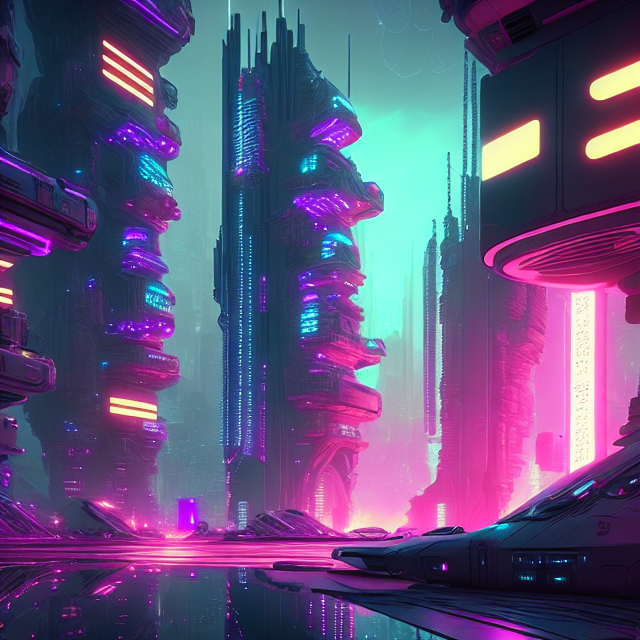

In [11]:
from diffusers import StableDiffusionPipeline
import torch

model_name = "dreamlike-art/dreamlike-diffusion-1.0"

pipe = StableDiffusionPipeline.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

prompt = "a dreamy futuristic cyberpunk city at night, ultra-detailed, cinematic lighting"
image = pipe(prompt).images[0]
image.save("dream.png")
image


  0%|          | 0/50 [00:00<?, ?it/s]

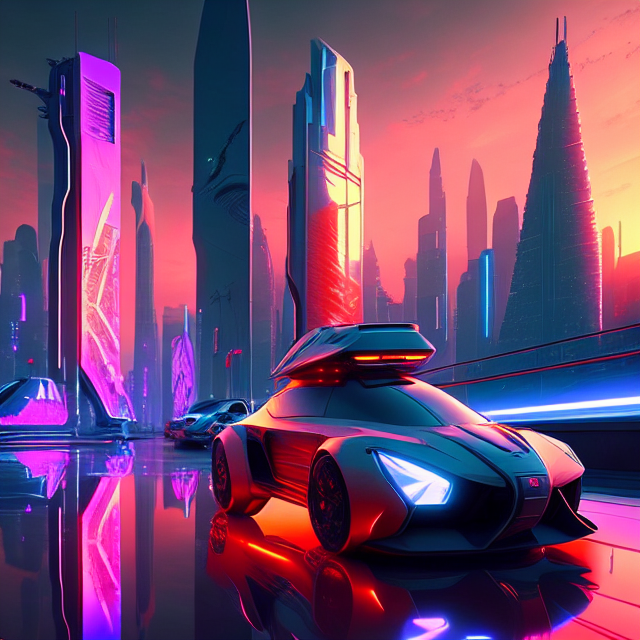

In [5]:
prompt = """
a futuristic city skyline at sunset, flying cars, neon reflections on wet streets, cinematic lighting, ultra realistic, 8k, detailed, masterpiece, artstation
"""

image = pipe(prompt).images[0]
image

## Text to speech Model



In [2]:
from transformers import pipeline
model_name = "suno/bark-small"

pipe = pipeline("text-to-speech",model=model_name, device="cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda


In [5]:
result = pipe("The attention mask and the pad token id were not set.")
result

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


{'audio': array([[0.00083337, 0.00023393, 0.00029663, ..., 0.0002067 , 0.00020526,
         0.00019862]], dtype=float32),
 'sampling_rate': 24000}

In [6]:
from IPython.display import Audio
Audio(result["audio"], rate=result["sampling_rate"])